Experimento 1 - Regresión Lineal Multivariada
Error cuadrático medio: 557.25


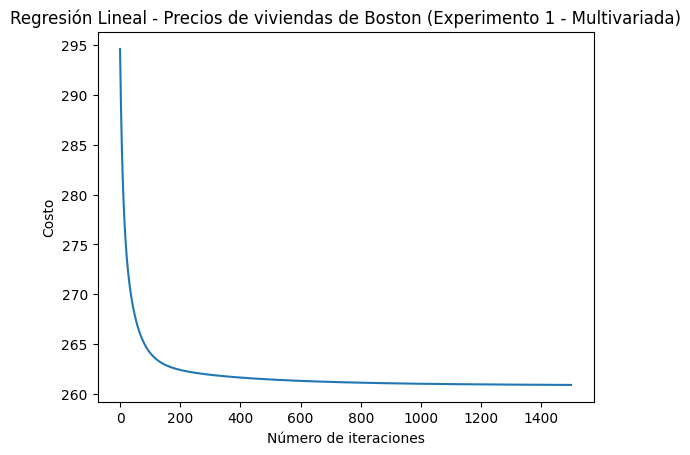

Experimento 1 - Regresión Lineal Univarida
Error cuadrático medio: 587.61


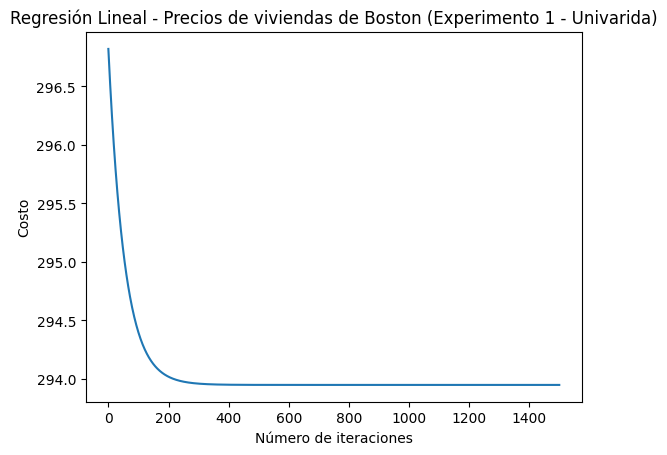

Experimento 2 - Regresión Lineal Multivariada
Error cuadrático medio (entrenamiento): 521.82
Error cuadrático medio (prueba): 557.25


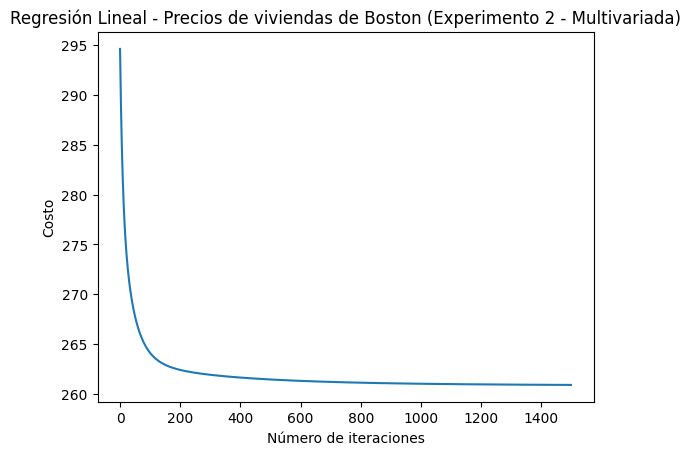

ValueError: ignored

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

boston = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(boston, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Selección de características
# Para regresión lineal univariada, descomentar la siguiente línea y comentar la línea X = data
# X = data[:, 1].reshape(-1, 1)
X = data
y = target

# Normalización
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División de los datos (entrenamiento 70%, prueba 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Funciones
def compute_cost(X, y, theta):
    m = len(y)
    h = X.dot(theta)
    J = 1/(2*m) * np.sum((h-y)**2)
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        h = X.dot(theta)
        theta = theta - (alpha/m) * X.T.dot(h-y)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

def mean_squared_error(y_pred, y_true):
    mse = np.mean((y_pred - y_true)**2)
    return mse
#------------------------



# Experimento 1 - Regresión Lineal Multivariada
alpha = 0.01
num_iters = 1500
theta = np.zeros(X_train.shape[1])
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)
y_pred = np.dot(X_test, theta)
mse = mean_squared_error(y_pred, y_test)
print("Experimento 1 - Regresión Lineal Multivariada\nError cuadrático medio: {:.2f}".format(mse))
plt.plot(np.arange(num_iters), J_history)
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo")
plt.title("Regresión Lineal - Precios de viviendas de Boston (Experimento 1 - Multivariada)")
plt.show()


#----------------------



# Experimento 1 - Regresión Lineal Univarida
alpha = 0.01
num_iters = 1500
theta = np.zeros(2)
theta[1], J_history = gradient_descent(X_train[:, 1].reshape(-1, 1), y_train, np.array([theta[1]]), alpha, num_iters)
y_pred = np.dot(X_test[:, 1].reshape(-1, 1), theta[1])
mse = mean_squared_error(y_pred, y_test)
print("Experimento 1 - Regresión Lineal Univarida\nError cuadrático medio: {:.2f}".format(mse))
plt.plot(np.arange(num_iters), J_history)
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo")
plt.title("Regresión Lineal - Precios de viviendas de Boston (Experimento 1 - Univarida)")
plt.show()

# Experimento 2 - Regresión Lineal Multivariada
alpha = 0.01
num_iters = 1500
theta = np.zeros(X_train.shape[1])
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)
y_pred = np.dot(X_train, theta)
mse_train = mean_squared_error(y_pred, y_train)
print("Experimento 2 - Regresión Lineal Multivariada\nError cuadrático medio (entrenamiento): {:.2f}".format(mse_train))
y_pred = np.dot(X_test, theta)
mse_test = mean_squared_error(y_pred, y_test)
print("Error cuadrático medio (prueba): {:.2f}".format(mse_test))
plt.plot(np.arange(num_iters), J_history)
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo")
plt.title("Regresión Lineal - Precios de viviendas de Boston (Experimento 2 - Multivariada)")
plt.show()

# Experimento 2 - Regresión Lineal Univarida
alpha = 0.01
num_iters = 1500
theta = np.zeros(2)
theta[1], J_history = gradient_descent(X_train[:, 1].reshape(-1, 1), y_train, theta[1], alpha, num_iters)
y_pred = np.dot(X_train[:, 1].reshape(-1, 1), theta[1])
mse_train = mean_squared_error(y_pred, y_train)
print("Experimento 2 - Regresión Lineal Univarida\nError cuadrático medio (entrenamiento): {:.2f}".format(mse_train))
y_pred = np.dot(X_test[:, 1].reshape(-1, 1), theta[1])
mse_test = mean_squared_error(y_pred, y_test)
print("Error cuadrático medio (prueba): {:.2f}".format(mse_test))
plt.plot(np.arange(num_iters), J_history)
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo")
plt.title("Regresión Lineal - Precios de viviendas de Boston (Experimento 2 - Univarida)")
plt.show()

# Experimento 3 - Regresión Lineal Multivariada y Univarida
alpha = 0.01
num_iters = 1500
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)
theta = np.zeros(X_train.shape[1])
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)
y_pred = np.dot(X_test, theta)
mse = mean_squared_error(y_pred, y_test)
print("Experimento 3 - Regresión Lineal Multivariada y Univarida\nError cuadrático medio: {:.2f}".format(mse))
plt.plot(np.arange(num_iters), J_history)
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo")
plt.title("Regresión Lineal - Precios de viviendas de Boston (Experimento 3)")
plt.show()